In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
# Load the dataset
dataset = pd.read_csv("/content/sample_data/leetcode.csv")

In [ ]:
# Explore the dimensions of the dataset
print("Dimensions of the dataset:", dataset.shape)

Dimensions of the dataset: (3000, 18)


<Axes: >

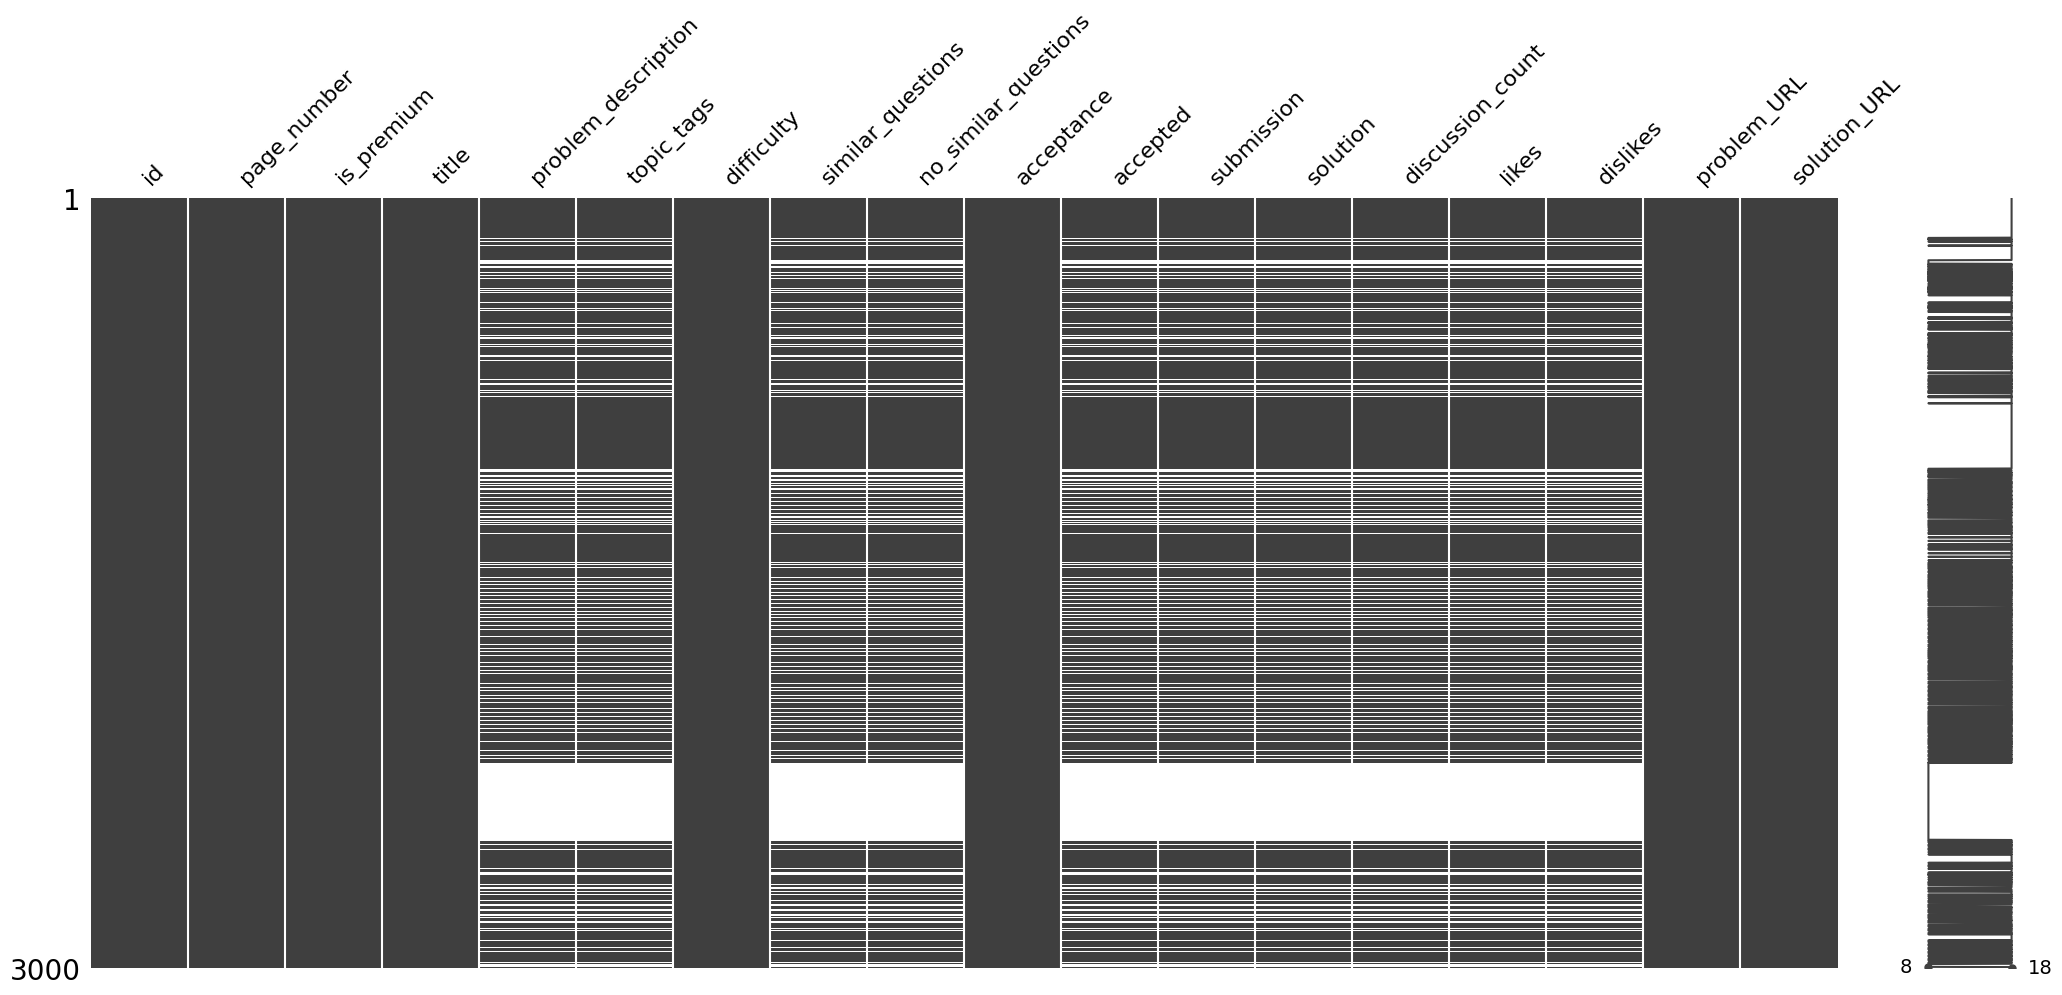

In [ ]:
# Visualize missing data
msno.matrix(dataset)

In [ ]:
# Count missing values in each column
missing_values_by_column = dataset.isnull().sum()

# Print the missing values
print("Missing values :")
print(missing_values_by_column)

Missing values :
id                        0
page_number               0
is_premium                0
title                     0
problem_description     840
topic_tags              840
difficulty                0
similar_questions       840
no_similar_questions    840
acceptance                0
accepted                840
submission              840
solution                840
discussion_count        840
likes                   840
dislikes                840
problem_URL               0
solution_URL              0
dtype: int64


In [ ]:
# Make a copy of the original data
data_copy = dataset.copy()

data_copy.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
id,1,2,3,4,5,6,7,8,9,10,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
page_number,1,1,1,1,1,1,1,1,1,1,...,60,60,60,60,60,60,60,60,60,60
is_premium,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
title,1. Two Sum,2. Add Two Numbers,3. Longest Substring Without Repeating Characters,4. Median of Two Sorted Arrays,5. Longest Palindromic Substring,6. Zigzag Conversion,7. Reverse Integer,8. String to Integer (atoi),9. Palindrome Number,10. Regular Expression Matching,...,2991. Top Three Wineries,2992. Number of Self-Divisible Permutations,2993. Friday Purchases I,2994. Friday Purchases II,2995. Viewers Turned Streamers,2996. Smallest Missing Integer Greater Than Se...,2997. Minimum Number of Operations to Make Arr...,2998. Minimum Number of Operations to Make X a...,2999. Count the Number of Powerful Integers,3000. Maximum Area of Longest Diagonal Rectangle
problem_description,Given an array of integers nums and an integer...,You are given two non-empty linked lists repre...,"Given a string s, find the length of the longe...",Given two sorted arrays nums1 and nums2 of siz...,"Given a string s, return the longest palindrom...","The string ""PAYPALISHIRING"" is written in a zi...","Given a signed 32-bit integer x, return x with...","Implement the myAtoi(string s) function, which...","Given an integer x, return true if x is a pali...","Given an input string s and a pattern p, imple...",...,NaN,NaN,NaN,NaN,NaN,You are given a 0-indexed array of integers nu...,You are given a 0-indexed integer array nums a...,You are given two positive integers x and y.\n...,"You are given three integers start, finish, an...",You are given a 2D 0-indexed integer array dim...
topic_tags,"'Array', 'Hash Table'","'Linked List', 'Math', 'Recursion'","'Hash Table', 'String', 'Sliding Window'","'Array', 'Binary Search', 'Divide and Conquer'","'String', 'Dynamic Programming'",'String','Math','String','Math',"'String', 'Dynamic Programming', 'Recursion'",...,NaN,NaN,NaN,NaN,NaN,"'Array', 'Hash Table', 'Sorting'","'Array', 'Bit Manipulation'","'Dynamic Programming', 'Breadth-First Search',...","'Math', 'String', 'Dynamic Programming'",'Array'
difficulty,Easy,Medium,Medium,Hard,Medium,Medium,Medium,Medium,Easy,Hard,...,Hard,Medium,Medium,Hard,Hard,Easy,Medium,Medium,Hard,Easy
similar_questions,"[""'3Sum'"", ""'4Sum'"", ""'Two Sum II - Input Arra...","[""'Multiply Strings'"", ""'Add Binary'"", ""'Sum o...","[""'Longest Substring with At Most Two Distinct...","[""'Median of a Row Wise Sorted Matrix'""]","[""'Shortest Palindrome'"", ""'Palindrome Permuta...",[''],"[""'String to Integer (atoi)'"", ""'Reverse Bits'...","[""'Reverse Integer'"", ""'Valid Number'"", ""'Chec...","[""'Palindrome Linked List'"", ""'Find Palindrome...","[""'Wildcard Matching'""]",...,NaN,NaN,NaN,NaN,NaN,"[""'Longest Common Prefix'"", ""'First Missing Po...","[""'Minimum Bit Flips to Convert Number'""]","[""'Shortest Bridge'"", ""'Minimum Moves to Sprea...","[""'Powerful Integers'"", ""'Numbers With Repeate...",['']
no_similar_questions,21.0,8.0,9.0,1.0,6.0,0.0,4.0,3.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,2.0,0.0
acceptance,51.0,41.5,34.1,38.3,33.2,46.2,27.9,16.8,54.7,27.9,...,56.9,84.9,85.8,88.1,53.7,29.4,76.1,40.5,22.0,34.5


In [ ]:
# Summary statistics for numerical features
print("Summary statistics:\n")
dataset.describe()

Summary statistics:



,id,page_number,no_similar_questions,acceptance,accepted,submission,solution,discussion_count,likes,dislikes
count,3000.000000,3000.000000,2160.000000,3000.000000,2.160000e+03,2.160000e+03,2160.000000,2160.000000,2160.000000,2160.000000
mean,1500.500000,30.500000,1.448611,55.610367,2.478878e+05,4.752565e+05,1653.675926,27.246296,2774.904630,403.934259
std,866.169729,17.320989,1.810409,15.702667,5.373006e+05,1.118383e+06,2515.823036,40.675622,4186.567949,986.693398
min,1.000000,1.000000,0.000000,11.300000,1.200000e+03,2.400000e+03,24.000000,0.000000,15.000000,1.000000
25%,750.750000,15.750000,0.000000,44.000000,2.350000e+04,4.897500e+04,286.000000,6.000000,456.000000,44.000000
50%,1500.500000,30.500000,1.000000,55.000000,6.630000e+04,1.169000e+05,706.000000,12.000000,1100.000000,132.000000
75%,2250.250000,45.250000,2.000000,66.700000,2.151500e+05,3.850750e+05,1900.000000,33.000000,3200.000000,354.250000
max,3000.000000,60.000000,21.000000,94.200000,1.130000e+07,2.210000e+07,26800.000000,638.000000,52700.000000,17200.000000


In [ ]:
# Check datatypes
data_types = dataset.dtypes
data_types

id                        int64
page_number               int64
is_premium                 bool
title                    object
problem_description      object
topic_tags               object
difficulty               object
similar_questions        object
no_similar_questions    float64
acceptance              float64
accepted                float64
submission              float64
solution                float64
discussion_count        float64
likes                   float64
dislikes                float64
problem_URL              object
solution_URL             object
dtype: object

In [ ]:
# Convert boolean column to numerical values
dataset['is_premium'] = dataset['is_premium'].astype(int)

# Define the mapping dictionary
difficulty_mapping = {'Easy': 0, 'Medium': 1, 'Hard':2}

# Map the difficulty levels to integers
dataset['difficulty'] = dataset['difficulty'].map(difficulty_mapping).fillna(2).astype(int)

In [ ]:
#Rechecking data types
print(dataset.dtypes)  # Should output 'int64'

id                        int64
page_number               int64
is_premium                int64
title                    object
problem_description      object
topic_tags               object
difficulty                int64
similar_questions        object
no_similar_questions    float64
acceptance              float64
accepted                float64
submission              float64
solution                float64
discussion_count        float64
likes                   float64
dislikes                float64
problem_URL              object
solution_URL             object
dtype: object


In [ ]:
# Fill missing values in numerical attributes with mean
data_copy['no_similar_questions'].fillna(dataset['no_similar_questions'].mean(), inplace=True)
data_copy['accepted'].fillna(dataset['accepted'].mean(), inplace=True)
data_copy['submission'].fillna(dataset['submission'].mean(), inplace=True)
data_copy['solution'].fillna(dataset['solution'].mean(), inplace=True)
data_copy['discussion_count'].fillna(dataset['discussion_count'].mean(), inplace=True)
data_copy['likes'].fillna(dataset['likes'].mean(), inplace=True)
data_copy['dislikes'].fillna(dataset['dislikes'].mean(), inplace=True)

In [ ]:
# Check for missing values in each column
missing_values = data_copy.isnull().sum()

print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
id                        0
page_number               0
is_premium                0
title                     0
problem_description     840
topic_tags              840
difficulty                0
similar_questions       840
no_similar_questions      0
acceptance                0
accepted                  0
submission                0
solution                  0
discussion_count          0
likes                     0
dislikes                  0
problem_URL               0
solution_URL              0
dtype: int64



**Data Visualization**


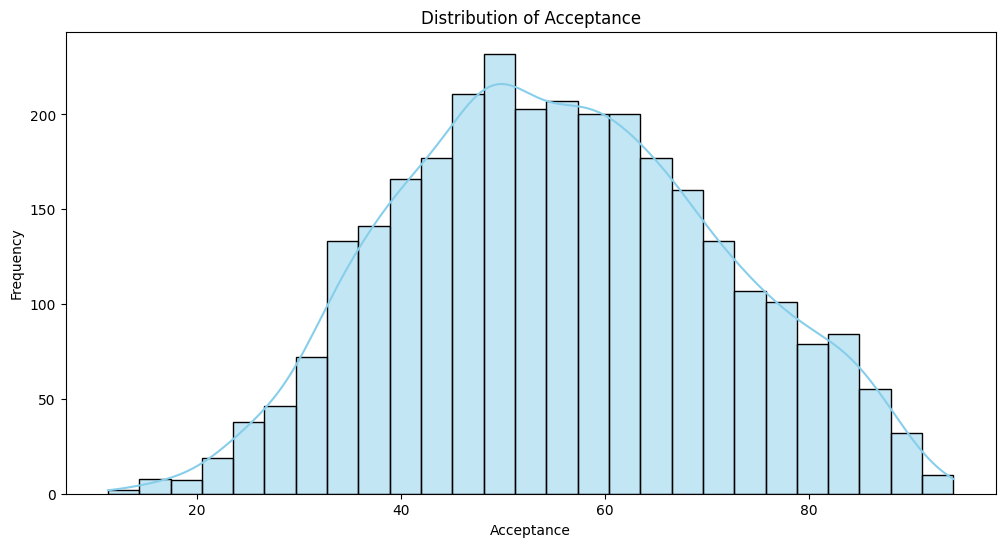

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset['acceptance'], kde=True, color='skyblue')
plt.xlabel('Acceptance')
plt.ylabel('Frequency')
plt.title('Distribution of Acceptance')
plt.show()


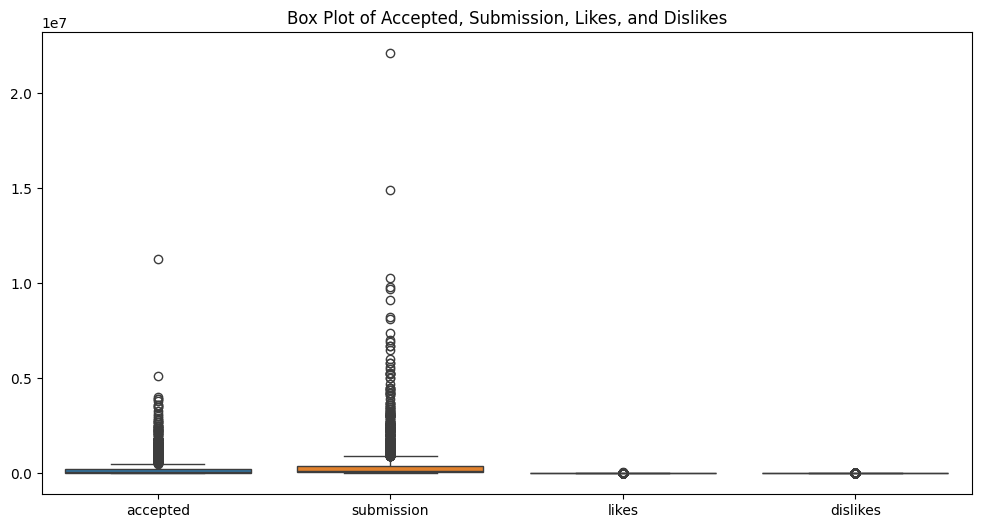

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset[['accepted', 'submission', 'likes', 'dislikes']])
plt.title('Box Plot of Accepted, Submission, Likes, and Dislikes')
plt.show()

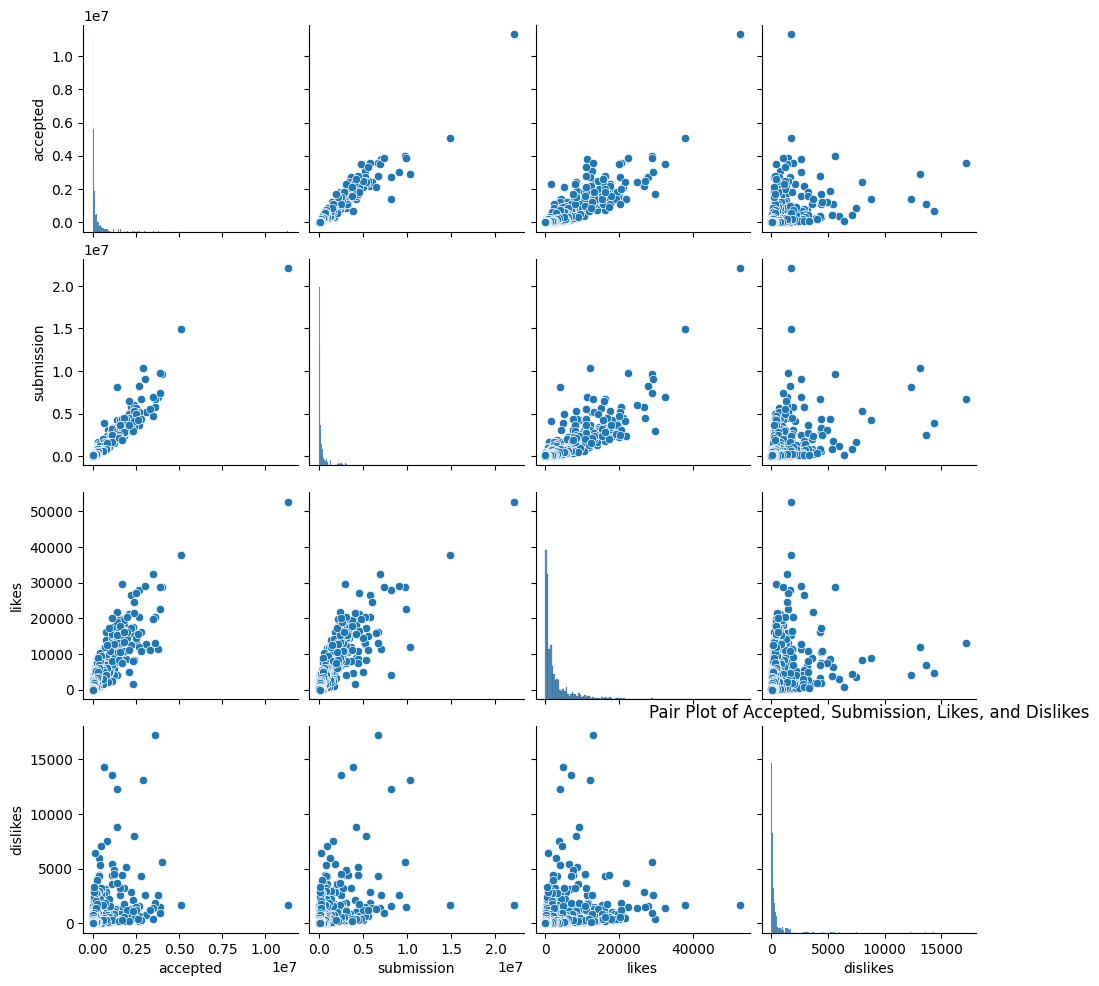

In [ ]:
sns.pairplot(dataset[['accepted', 'submission', 'likes', 'dislikes']])
plt.title('Pair Plot of Accepted, Submission, Likes, and Dislikes')
plt.show()


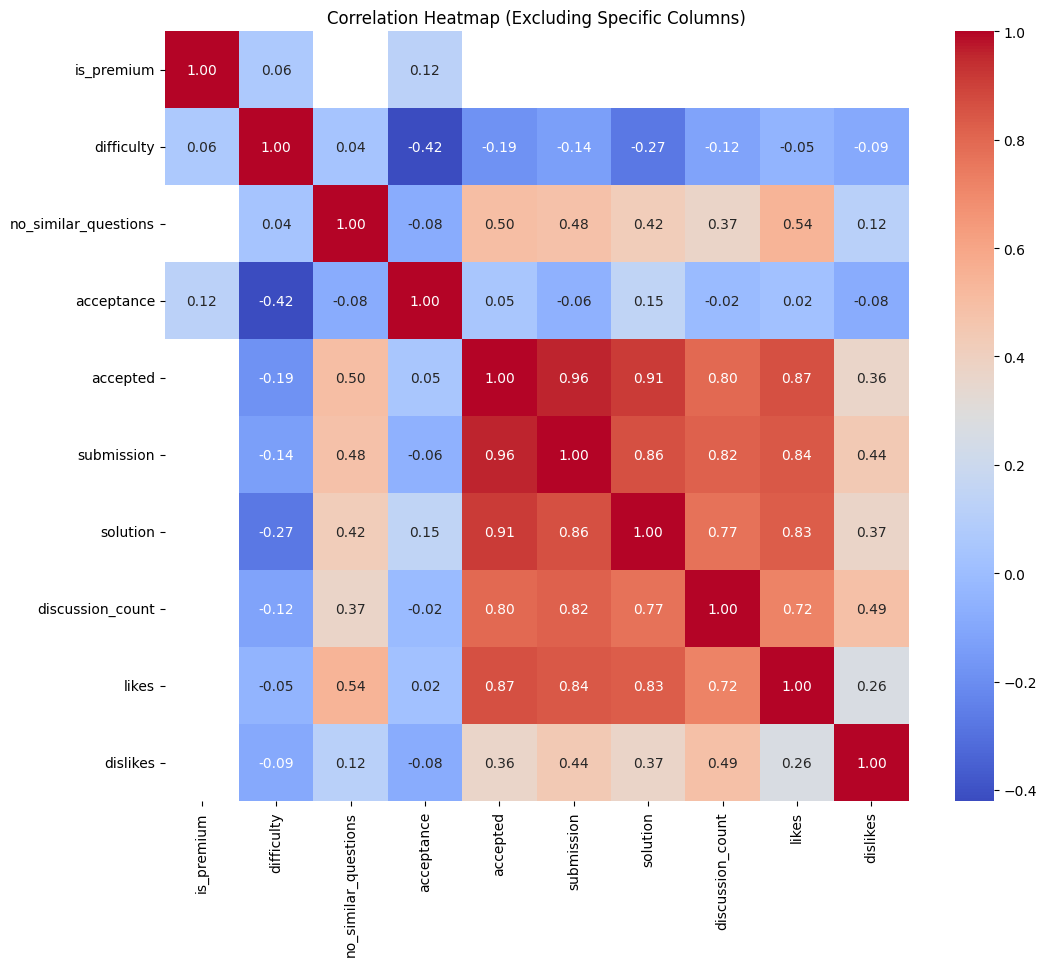

In [ ]:
# Select numerical columns excluding the specified ones
numerical_columns = [col for col in dataset.columns if dataset[col].dtype in ['int64', 'float64']
                     and col not in ['id','page_number','title', 'problem_description', 'topic_tags', 'similar_questions', 'problem_URL', 'solution_URL']]

# Compute the correlation matrix for selected numerical columns
correlation_matrix = dataset[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Excluding Specific Columns)')
plt.show()

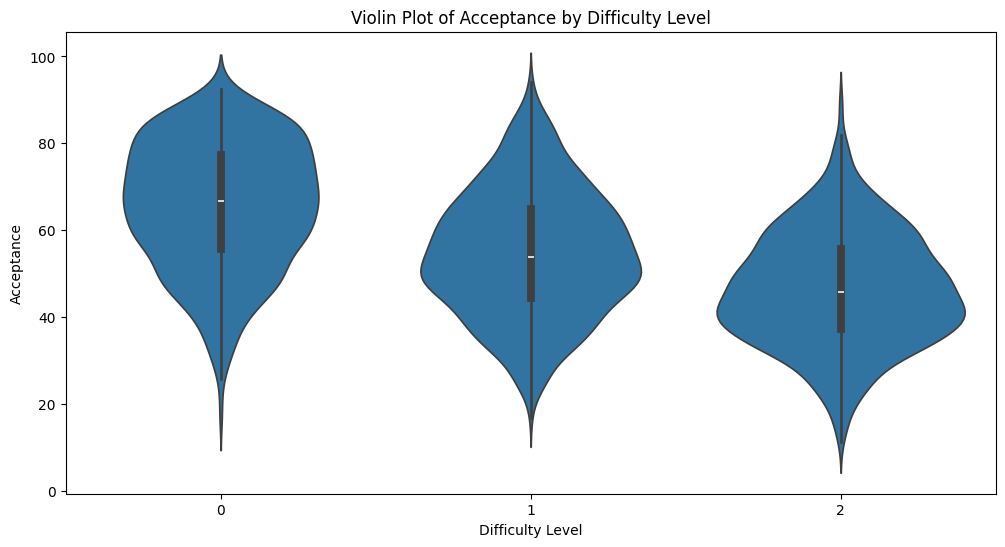

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataset, x='difficulty', y='acceptance')
plt.title('Violin Plot of Acceptance by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Acceptance')
plt.show()

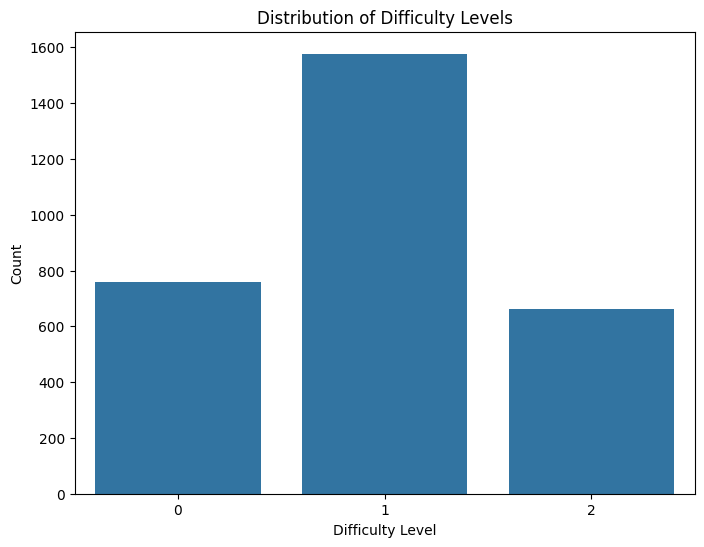

In [ ]:
# Visualize the distribution of difficulty levels
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='difficulty')
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.show()

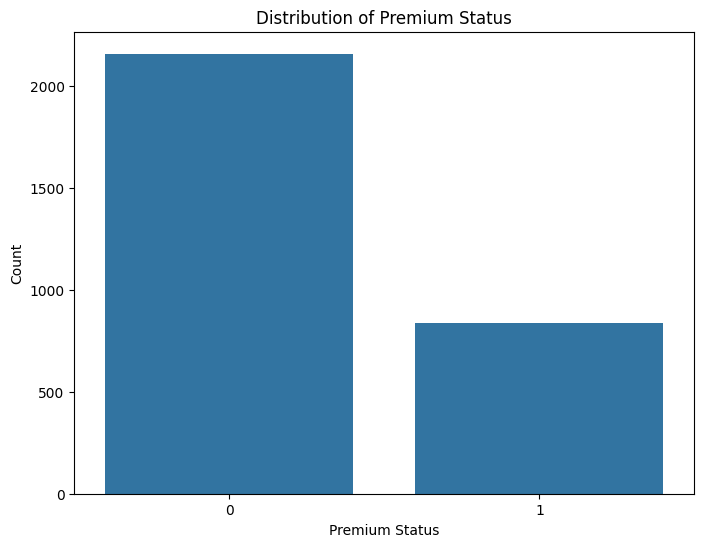

In [ ]:
# Visualize the premium status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='is_premium')
plt.title('Distribution of Premium Status')
plt.xlabel('Premium Status')
plt.ylabel('Count')
plt.show()

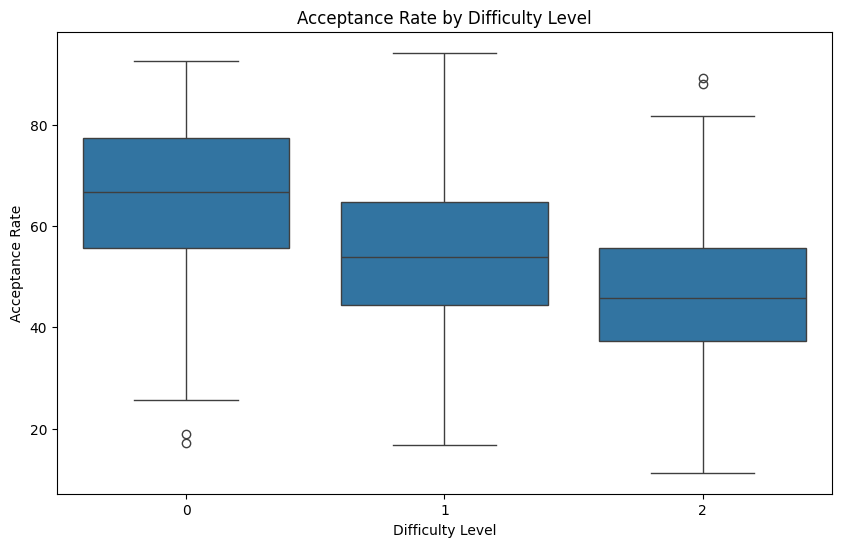

In [ ]:
# Explore the relationship between acceptance rate and difficulty level
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='difficulty', y='acceptance')
plt.title('Acceptance Rate by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Acceptance Rate')
plt.show()

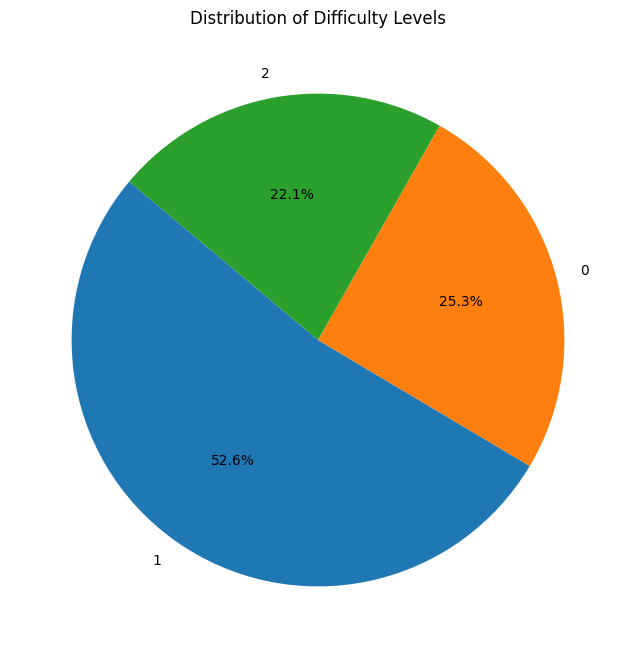

In [ ]:
# Count the occurrences of each difficulty level
difficulty_counts = dataset['difficulty'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(difficulty_counts, labels=difficulty_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Difficulty Levels')
plt.show()


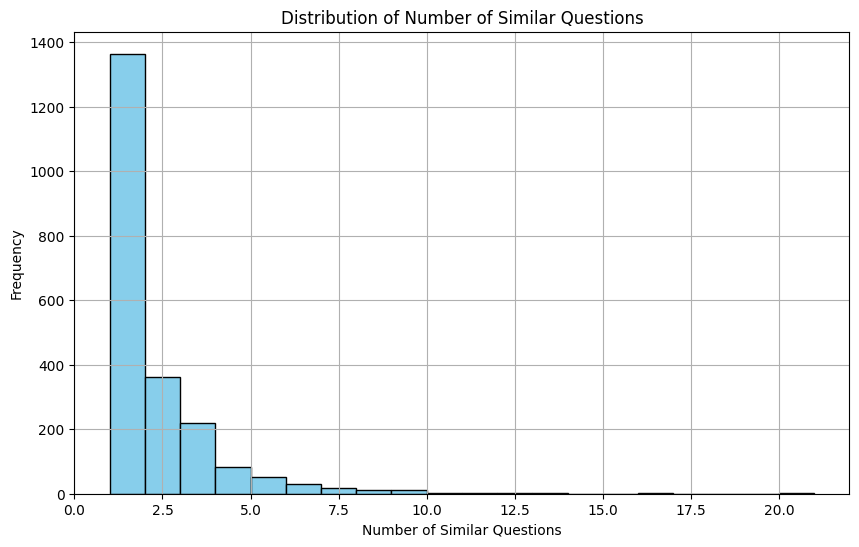

In [ ]:
import ast

# Replace NaNs with an empty list
dataset['similar_questions'] = dataset['similar_questions'].fillna('[]')

# Convert string representation of list to actual list
dataset['similar_questions'] = dataset['similar_questions'].apply(lambda x: ast.literal_eval(x))

# Extract the number of similar questions for each problem
dataset['num_similar_questions'] = dataset['similar_questions'].apply(lambda x: len(x))

# Plot a histogram to visualize the distribution of the number of similar questions
plt.figure(figsize=(10, 6))
plt.hist(dataset['num_similar_questions'], bins=range(1, max(dataset['num_similar_questions']) + 1), color='skyblue', edgecolor='black')
plt.xlabel('Number of Similar Questions')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Similar Questions')
plt.grid(True)
plt.show()

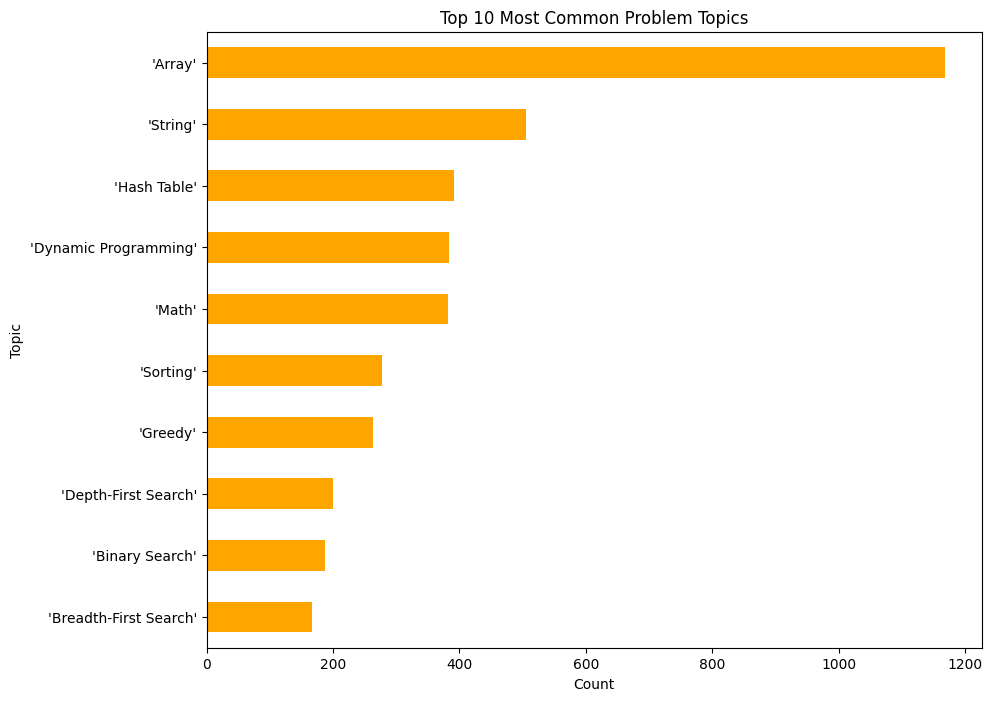

In [ ]:
# Distribution of Topic Tags
top_n_topics = 10
topics_counts = dataset['topic_tags'].str.split(',').explode().str.strip().value_counts().nlargest(top_n_topics)

plt.figure(figsize=(10, 8))
topics_counts.plot(kind='barh', color='orange')
plt.title(f'Top {top_n_topics} Most Common Problem Topics')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.gca().invert_yaxis()
plt.show()

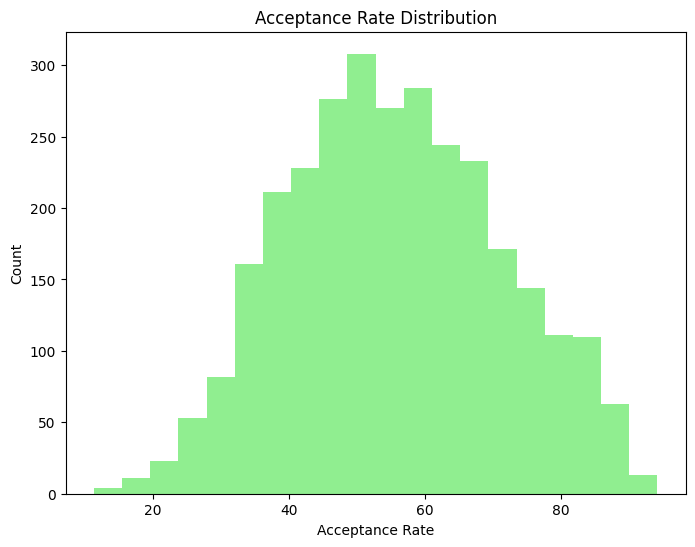

In [ ]:
# Distribution of Acceptance Rates
plt.figure(figsize=(8, 6))
plt.hist(dataset['acceptance'], bins=20, color='lightgreen')
plt.title('Acceptance Rate Distribution')
plt.xlabel('Acceptance Rate')
plt.ylabel('Count')
plt.show()

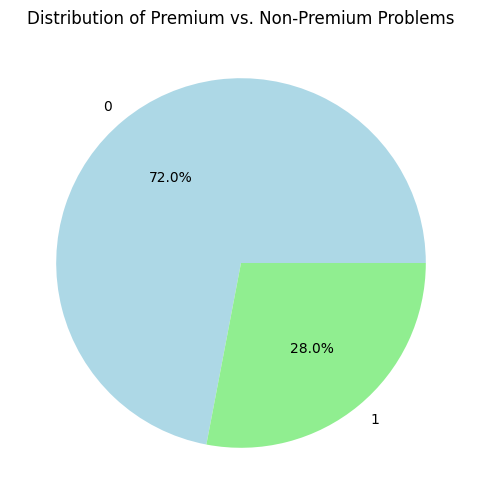

In [ ]:
# Premium vs. Non-Premium Problems
plt.figure(figsize=(6, 6))
dataset['is_premium'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Premium vs. Non-Premium Problems')
plt.ylabel('')
plt.show()

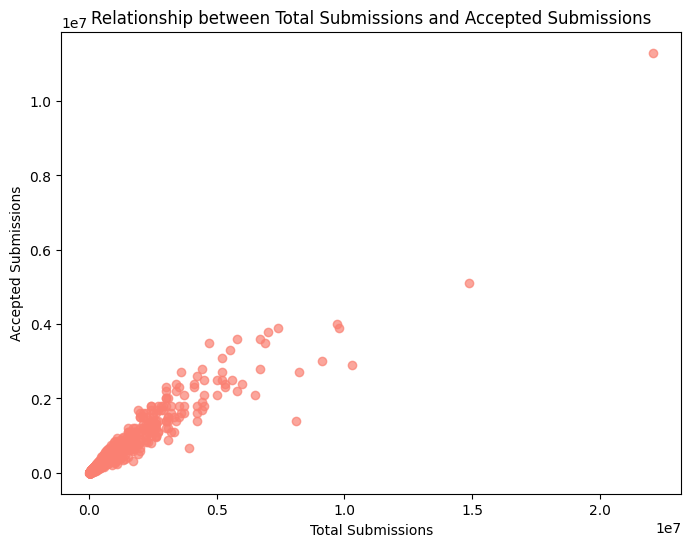

In [ ]:
# Relationship between Total Submissions and Accepted Submissions
plt.figure(figsize=(8, 6))
plt.scatter(dataset['submission'], dataset['accepted'], color='salmon', alpha=0.7)
plt.title('Relationship between Total Submissions and Accepted Submissions')
plt.xlabel('Total Submissions')
plt.ylabel('Accepted Submissions')
plt.show()

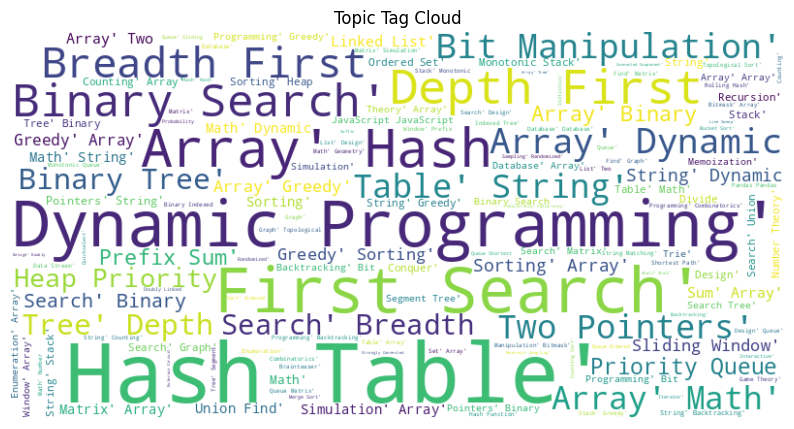

In [ ]:
from wordcloud import WordCloud

# Concatenate all topic tags into a single string
all_topic_tags = ','.join(dataset['topic_tags'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_topic_tags)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Topic Tag Cloud')
plt.axis('off')
plt.show()


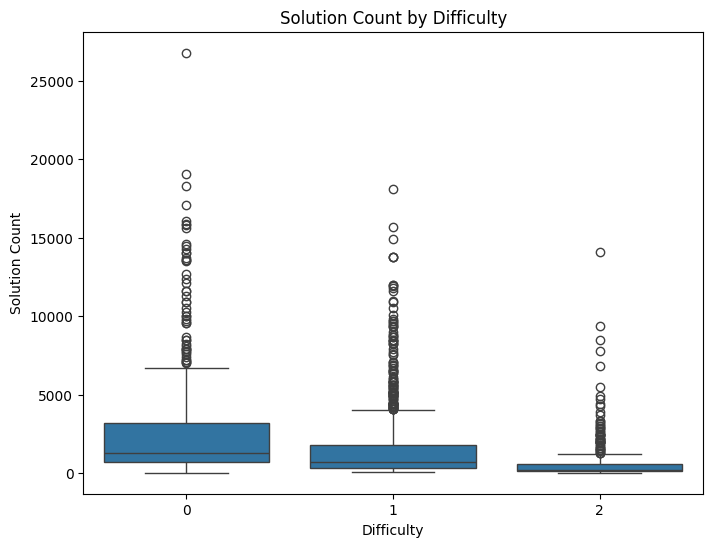

In [ ]:
# Box plot to compare solution count across different difficulty levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='difficulty', y='solution', data=dataset)
plt.title('Solution Count by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Solution Count')
plt.show()

**Data PreProcessing**

In [ ]:
#Changing acceptance from percentage to range from 0 to 1
data_copy['acceptance'] = data_copy['acceptance'] / 100

In [ ]:
#Normalization Of Numerical Data

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame containing the specified numerical features
numerical_features = ['accepted', 'submission', 'solution', 'discussion_count', 'likes', 'dislikes']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
data_copy[numerical_features] = scaler.fit_transform(data_copy[numerical_features])

# Display the normalized data
print(data_copy[numerical_features])


      accepted  submission  solution  discussion_count     likes  dislikes
0     1.000000    1.000000  1.000000          1.000000  1.000000  0.098785
1     0.353914    0.438853  0.585450          0.670846  0.548259  0.325542
2     0.451269    0.674173  0.675082          0.371473  0.715289  0.098785
3     0.194605    0.262363  0.525695          0.476489  0.504603  0.168556
4     0.238857    0.370972  0.357634          0.352665  0.529278  0.092971
...        ...         ...       ...               ...       ...       ...
2995  0.001478    0.002647  0.006050          0.045455  0.000645  0.007849
2996  0.001089    0.000692  0.004930          0.006270  0.000892  0.000174
2997  0.000752    0.000973  0.005341          0.025078  0.002164  0.001047
2998  0.000106    0.000385  0.001232          0.007837  0.000892  0.000116
2999  0.001814    0.002733  0.005976          0.006270  0.000759  0.000407

[3000 rows x 6 columns]


**Feature Extraction**

In [ ]:
#Acceptance Rate
data_copy['acceptance_ratio'] = data_copy['accepted'] / data_copy['submission']

# Engagment Metric (Average solutions per discussion)
data_copy['avg_solution_per_discussion'] = data_copy['solution'] /data_copy['discussion_count']

# Display the DataFrame with new features
print(data_copy)

        id  page_number  is_premium  \
0        1            1       False   
1        2            1       False   
2        3            1       False   
3        4            1       False   
4        5            1       False   
...    ...          ...         ...   
2995  2996           60       False   
2996  2997           60       False   
2997  2998           60       False   
2998  2999           60       False   
2999  3000           60       False   

                                                  title  \
0                                            1. Two Sum   
1                                    2. Add Two Numbers   
2     3. Longest Substring Without Repeating Characters   
3                        4. Median of Two Sorted Arrays   
4                      5. Longest Palindromic Substring   
...                                                 ...   
2995  2996. Smallest Missing Integer Greater Than Se...   
2996  2997. Minimum Number of Operations to Make Arr...   


**Model Training**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

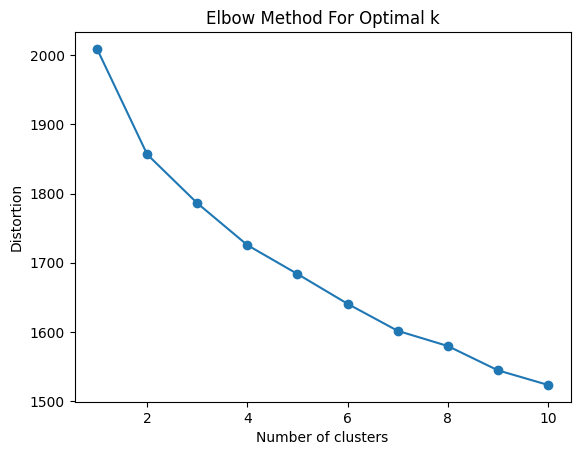

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_title
Graph and Tree Algorithms          1201
Array and String Problems           385
Mathematical and Geometry Tasks     383
Dynamic Programming Challenges      191
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt


# Combine problem description and topic tags into a single text column
data_copy['combined_text'] = data_copy['problem_description'] + ' ' + data_copy['topic_tags']

# Drop any rows with missing values
data_copy.dropna(subset=['combined_text'], inplace=True)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data_copy['combined_text'])

# Reduce dimensionality with TruncatedSVD for efficiency
svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)

# Determine optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_lsa)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# Based on the plot, choose the optimal number of clusters and fit KMeans
k = 4  # Adjust based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_lsa)
clusters = kmeans.predict(X_lsa)

# Add cluster labels to DataFrame
data_copy['cluster'] = clusters

# Define cluster titles based on characteristics of the problems in each cluster
cluster_titles = {
    0: "Array and String Problems",
    1: "Graph and Tree Algorithms",
    2: "Dynamic Programming Challenges",
    3: "Mathematical and Geometry Tasks"
}

# Assign cluster titles to DataFrame
data_copy['cluster_title'] = data_copy['cluster'].map(cluster_titles)

# Print the counts of problems in each cluster along with their titles
cluster_counts = data_copy['cluster_title'].value_counts()
print(cluster_counts)


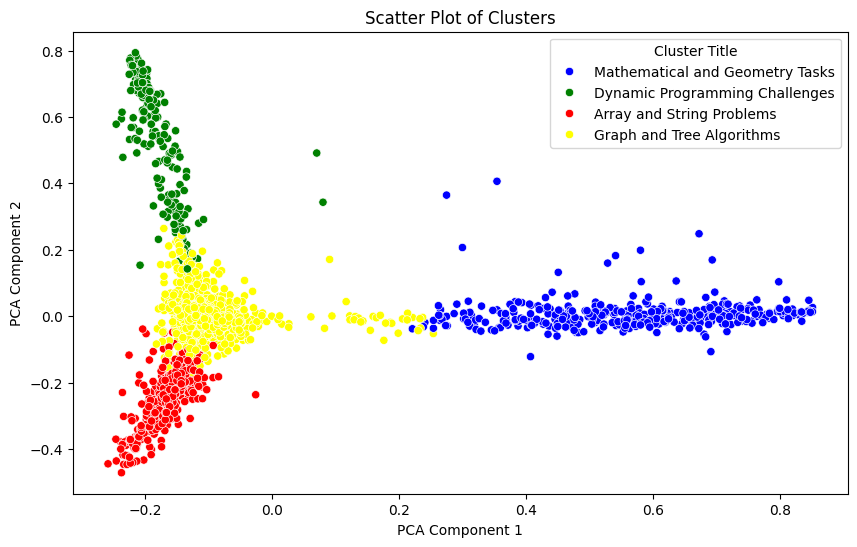

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_lsa)

# Add PCA components to DataFrame
data_copy['PCA1'] = X_pca[:, 0]
data_copy['PCA2'] = X_pca[:, 1]
# Define custom color palette
custom_palette = {'Array and String Problems': 'red',
                  'Graph and Tree Algorithms': 'yellow',
                  'Dynamic Programming Challenges': 'green',
                  'Mathematical and Geometry Tasks': 'blue'}

# Plot scatter plot with custom color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_title', data=data_copy, palette=custom_palette)
plt.title('Scatter Plot of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Title')
plt.show()


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import confusion_matrix, silhouette_score, calinski_harabasz_score

# Compute confusion matrix
# Note: Since we don't have true labels, we won't be able to compute a confusion matrix
# Instead, you can use metrics like Silhouette Score and Calinski-Harabasz Index

# Compute Silhouette Score
silhouette_avg = silhouette_score(X_lsa, clusters)
print("Silhouette Score:", silhouette_avg)

# Compute Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_lsa, clusters)
print("Calinski-Harabasz Index:", calinski_harabasz)
#The Silhouette Score of 0.3366 suggests that the clusters are moderately well-separated, as the value is closer to 1 than to 0. This indicates that the clusters are reasonably dense and distinct from each other.
#The Calinski-Harabasz Index of 496.91 indicates a relatively high value, suggesting that the clusters are well-separated and internally coherent

Silhouette Score: 0.09154395338618505
Calinski-Harabasz Index: 118.10002945283127


In [ ]:
#Predictive Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select relevant features for prediction
# For this example, let's predict acceptance rate based on difficulty level and likes
X = data_copy[['difficulty', 'likes']]
y = data_copy['acceptance']

# Convert categorical variables (difficulty) into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict acceptance rate on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, you can print the coefficients of the model
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Mean Squared Error: 0.018392630737679848
Intercept: 0.6512354145256635
Coefficients: [ 0.03034252 -0.20667801 -0.12330064]


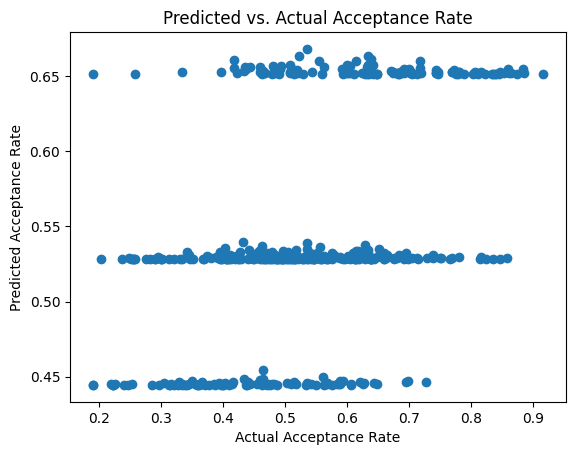

In [58]:
#Scatter Plot of Predicted vs. Actual Values:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Acceptance Rate')
plt.ylabel('Predicted Acceptance Rate')
plt.title('Predicted vs. Actual Acceptance Rate')
plt.show()

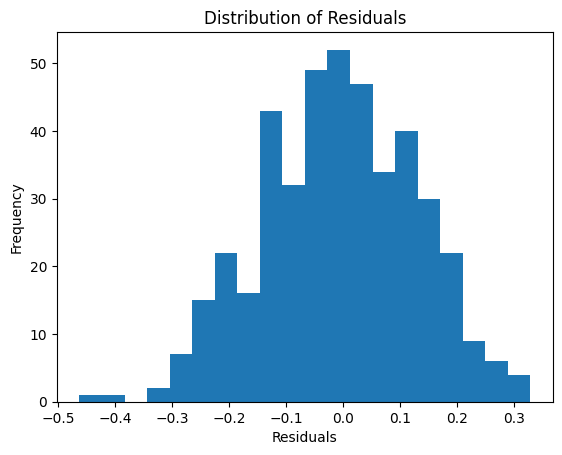

In [61]:
#Distribution of Residuals:
#This plot shows the distribution of the residuals. Ideally, they should be normally distributed around zero.plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [ ]:
#Interpretation

import numpy as np

# Assess predictive performance using evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
r_squared = model.score(X_test, y_test)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R^2): {r_squared}')

# Identify significant features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print('Feature Importance:')
print(feature_importance)

Mean Squared Error (MSE): 0.018392630737679848
Mean Absolute Error (MAE): 0.10971293430432892
R-squared (R^2): 0.22296544782952077
Feature Importance:
             Feature  Coefficient
0              likes     0.030343
2  difficulty_Medium    -0.123301
1    difficulty_Hard    -0.206678
